In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

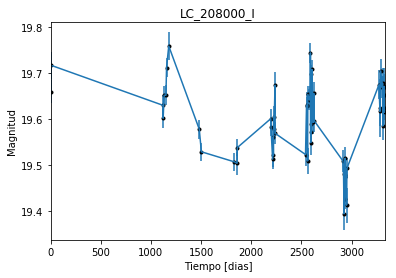

In [2]:
data = np.genfromtxt('LC_208000_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_208000_I')
plt.savefig("LC_208000_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

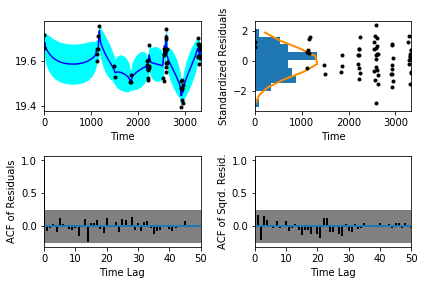

In [5]:
sample.assess_fit()

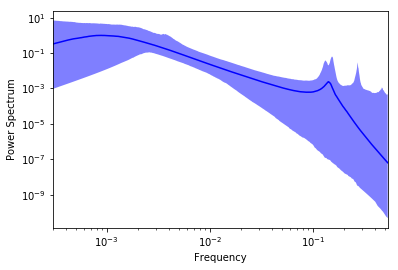

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

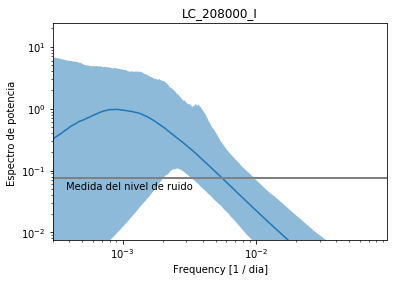

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_208000_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_208000_I')

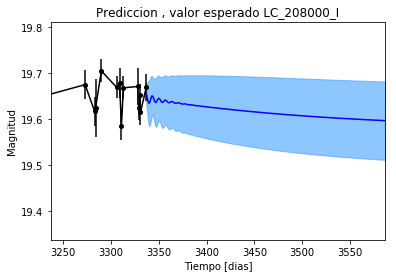

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_208000_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_208000_I')

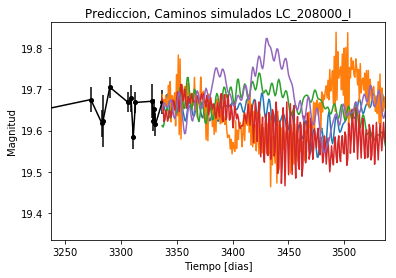

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_208000_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


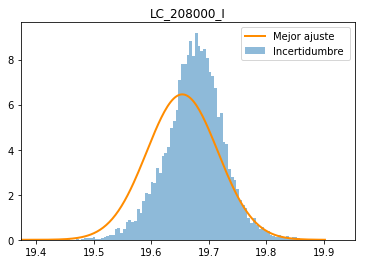

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_208000_I')
plt.savefig("Mejor_ajuste_LC_208000_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_208000_I')

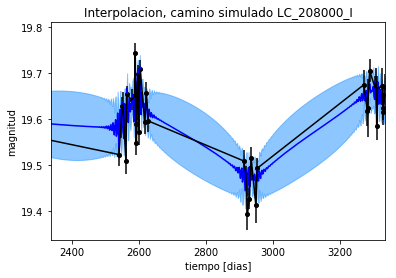

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_208000_I')

Text(0.5,1,'Interpolacion, camino simulado LC_208000_I')

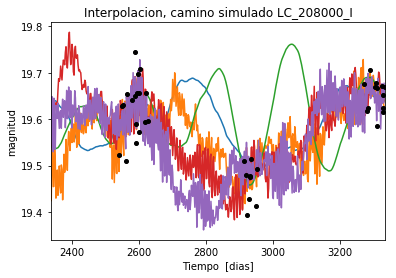

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_208000_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 161.37900341
Median: 0.00543929453137
Standard deviation: 0.101184127403
68% credibility interval: [ 0.00249569  0.01433379]
95% credibility interval: [ 0.00062247  0.34635158]
99% credibility interval: [  3.58079321e-04   7.25305493e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 112.996772964
Median: 0.00526142256535
Standard deviation: 0.0829035522655
68% credibility interval: [ 0.00239152  0.01362171]
95% credibility interval: [ 0.00056646  0.29670299]
99% credibility interval: [  3.40466870e-04   6.04251654e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 165.649381417
Median: 0.000733237343775
Standard deviatio

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 379.285017542
Median: 115.708116109
Standard deviation: 2.63504141462
68% credibility interval: [ 112.33148168  117.62192809]
95% credibility interval: [ 108.98099382  118.74063535]
99% credibility interval: [ 106.79811594  119.2728008 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 364.913962026
Median: 0.109190409747
Standard deviation: 1.83475880219
68% credibility interval: [ 0.04778744  1.99819554]
95% credibility interval: [ 0.0263106   6.46274568]
99% credibility interval: [ 0.01932882  9.99739314]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 217.327523423
Median: 0.959552711287
Standard deviation: 7.49411323488
68% credibility interval: [ 0.73059025  7.88596029]
95% credibility interval: [  0.4967864  28

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 637.342242321
Median: 1.37033138937e+21
Standard deviation: 1.83172083804e+100
68% credibility interval: [  3.78480680e-28   1.05166388e+66]
95% credibility interval: [  1.40529436e-110   1.13353180e+097]
99% credibility interval: [  3.09707107e-123   1.02330295e+100]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 806.617205757
Median: 19.5894866462
Standard deviation: 0.0293247156312
68% credibility interval: [ 19.56701553  19.61599437]
95% credibility interval: [ 19.54090708  19.65710797]
99% credibility interval: [ 19.51673275  19.70645916]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 443.325278495
Median: 0.153563143192
Standard deviation: 0.179133622875
68% credibility interval: [ 0.13318691  0.35241329]
95% credibility interval: [ 0.00353187  0.73939287]
99% credibility interval: [ 0.          0.90156148]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 443.325278495
Median: 0.153563143192
Standard deviation: 0.179133622875
68% credibility interval: [ 0.13318691  0.35241329]
95% credibility interval: [ 0.00353187  0.73939287]
99% credibility interval: [ 0.          0.90156148]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 508.296682861
Median: 0.000550840832806
Standard deviation: 0.0010398028

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 379.285017542
Median: 115.708116109
Standard deviation: 2.63504141462
68% credibility interval: [ 112.33148168  117.62192809]
95% credibility interval: [ 108.98099382  118.74063535]
99% credibility interval: [ 106.79811594  119.2728008 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 581.720289692
Median: 0.00708638686728
Standard deviation: 0.00488521481084
68% credibility interval: [ 0.00460911  0.01125147]
95% credibility interval: [ 0.00310154  0.01918798]
99% credibility interval: [ 0.00253047  0.03449245]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 425.414770789
Median: 1.40206807511
Standard deviation: 0.284462041847
68% credibility interval: [ 1.12719607  1.74825155]
95% credibility interval: [ 0.91264478  1.94962483]
99% credibility interval: [ 0.7955714   1.99260565]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 549.611637051
Median: 1.00458692572e-23
Standard deviation: 0.0990672792922
68% credibility interval: [  7.96212946e-69   1.65143779e-02]
95% credibility interval: [  2.98290276e-99   1.71103008e-01]
99% credibility interval: [  2.70716633e-102   4.73271848e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 161.37900341
Median: (-0.0341760954809-1.69633754074j)
Standard deviation: 1.29267406496
68% credibility interval: [-0.09006185-0.96869001j -0.01568090-0.90253619j]
95% credibility interval: [-2.17619118-0.12511421j -0.00391111-0.04997806j]
99% credibility interval: [ -4.55722882e+00-4.35993577j  -2.24987873e-03-0.01440441j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 112.996772964
Median: (-0.0330584929575+2.66384958892j)
Standard deviation: 1.24022269607
68% credibility interval: [-0.08558775+0.86165661j -0.01502635+0.9740239j ]
95% credibility interval: [-1.86423989+0.j         -0.00355920+0.94468501j]
99% credibility interval: [ -3.79662512e+00+0.j          -2.13921644e-03+0.94669094j]
Posterior summary for par